**Computation of interevent time**

In [15]:
import numpy as np

def INT_T_FUNC(a , t ):                                            #I have taken an array and a threshold value 
  final=[]
  count = 0
  y = 0
  x = 0
  ayaa = np.array(a)
  for q in range ( 0, len (ayaa)):                               #I have used a for loop to iterate through array 
    if (ayaa[q] > t) :                                           # 3 if statements run
      x = q                                                      # first if condition state if  value of that index is greter than threshold 
      count = count +1                                           # that index value will be assigned to a variable and countwill be incremented
      if count == 1:          
        y = x  
      if count == 2:                                               # when count values reached 2 then 2 index will be subtracted and the result will apended to a list 
        count = count -1
        r = x-y
        y = x 
        final.append(r)
  final=np.array(final)                                             #List is converted to array and printed 
  return final    






In [16]:
INT_T_FUNC([10,15,5,20,25] , 11)

array([2, 1])

**Computation of Horizontal Visibility Graph**


In [18]:
def TS_HVG_FUNC(st):
  import pandas as pd
  import numpy as np

  temp = 0
  matrix=np.zeros((len(st),len(st)))        
  arr = np.array(st)
  for i in range(0, len(arr)):                              #I have used 2 for loops, 3 if conditions. 
    for j in range(1, len(arr)):         
      if(j-i)== 1:                                          # subtracting 2 index if we get 1(i.e 2-1 = 1), then there is no time series between 2 index. 
        matrix[i,j] = 1                                     # Result in inserting 1 to the index(1,2) and (2,1) to the matrix 
        matrix[j,i] = 1
      
      elif (j-i)== 0 :                                    # subtracting 2 index if we get 0 (i.e 2-2 = 0), then there is no time series between 2 index.        
        matrix[i,j] = 0                                   # Result in inserting 0 to the index(2,2) matrix 
        matrix[j,i] = 0

      elif (((arr[i]>arr[i+1:j]).all() and (arr[j] > arr[i+1:j]).all())):       # if value of index 1 and index 3 > value of the index between 1 and 3 index 
        matrix[i,j] = 1                                                         # Then the index (1,3) = 1 in matrix [1,3] and [3,1]
        matrix[j,i] = 1 
      else: 
        matrix[i,j] = 0                                                     
        matrix[j,i] = 0 
       
    
  print(matrix)



      
      

In [19]:
TS_HVG_FUNC([10,5,15])

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


**From the Opportunity Insights Economic Tracker data generate several time
series plots that track the percentage change in employment across the United
States by income group and the type of industry (30 points)**

In [1]:

from google.colab import files
uploaded = files.upload()

Saving Employment - National - Weekly.csv to Employment - National - Weekly.csv


In [2]:
import pandas as pd
en = pd.read_csv('Employment - National - Weekly.csv')
en

,year,month,day_endofweek,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,...,emp_subset_reweighted_q3,emp_retail,emp_retail_inclow,emp_retail_incmiddle,emp_retail_inchigh,emp_s72,emp_ss40,emp_ss60,emp_ss65,emp_ss70
0,2020,1,17,0.000780,0.00236,-0.000029,0.00172,-0.000698,0.000816,0.000921,...,0.001670,0.000051,0.00322,-0.000073,-0.00571,0.000606,0.000815,0.001290,0.000854,0.000618
1,2020,1,24,-0.000584,-0.00116,0.000132,0.00146,-0.003570,0.000773,-0.000381,...,0.001400,-0.001610,-0.00176,0.001020,-0.01210,-0.000259,-0.000614,-0.000960,0.000502,-0.000325
2,2020,1,31,-0.001260,-0.00436,0.000751,0.00089,-0.003880,0.000818,-0.001290,...,0.000975,-0.002710,-0.00850,0.000614,-0.00498,-0.002510,-0.002130,-0.001370,0.001590,-0.001770
3,2020,2,7,-0.000936,-0.00741,0.000771,0.00201,-0.001180,0.001370,-0.002490,...,0.002410,-0.003730,-0.01400,0.000232,0.00019,-0.003170,-0.002820,0.000595,0.003120,-0.001920
4,2020,2,14,0.000017,-0.00952,-0.001850,0.00608,0.003350,0.001980,-0.004910,...,0.006230,-0.003570,-0.01210,0.000952,-0.00526,-0.001330,-0.002780,0.003370,0.003480,-0.000206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022,5,6,-0.082500,-0.20900,-0.062100,-0.02960,-0.064300,-0.046400,-0.121000,...,-0.030200,-0.087000,-0.20900,-0.043800,-0.02360,-0.220000,-0.071100,0.007370,-0.128000,-0.198000
121,2022,5,13,-0.076400,-0.20800,-0.037900,-0.02840,-0.071400,-0.033300,-0.106000,...,-0.027200,-0.081700,-0.20900,-0.029700,-0.04460,-0.207000,-0.065600,0.013900,-0.123000,-0.186000
122,2022,5,20,-0.073400,-0.22000,0.017500,-0.04220,-0.104000,-0.011300,-0.077100,...,-0.036200,-0.076200,-0.22700,-0.002080,-0.08390,-0.198000,-0.060800,0.017500,-0.123000,-0.177000
123,2022,5,27,-0.072900,-0.24100,0.072400,-0.06390,-0.129000,0.006500,-0.052500,...,-0.053400,-0.073400,-0.25700,0.021400,-0.10200,-0.194000,-0.059200,0.019100,-0.125000,-0.173000


In [11]:
en['day_endofweek'] = en['day_endofweek'].apply(str)              # since day , month and year were in the form of integer. So converted into string format. 
en['month'] = en['month'].apply(str)                              # so that I could use it to subset to a single column and convert it to a date and time format.
en['year'] = en['year'].apply(str)      
en['DATE'] = en['year'] + '-' + en['month'] + '-' + en['day_endofweek']       #mereged 3 columns into one 
en['DATE'] = pd.to_datetime(en['DATE'])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'INCOME')

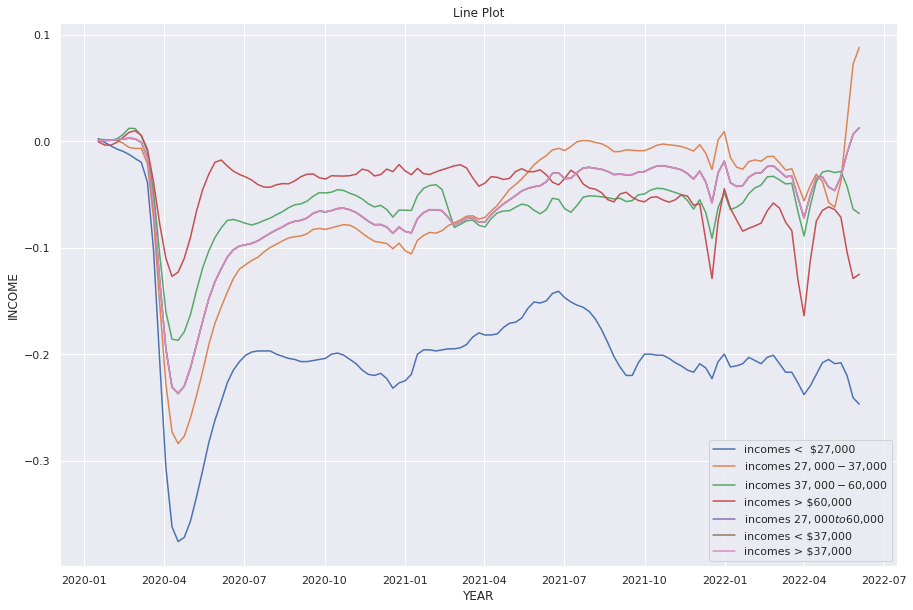

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(15,10)})


en_subset1 = en[['emp_incq1' , 'emp_incq2' , 'emp_incq3', 'emp_incq4', 'emp_incmiddle' , 'emp_incbelowmed' ,'emp_incabovemed', 'DATE']]    # subseted 4 employment salary level into one dataset 

sns.lineplot(en_subset1['DATE'],en_subset1['emp_incq1'], err_style=None ,label = 'incomes <  $27,000')
sns.lineplot(en_subset1['DATE'],en_subset1['emp_incq2'], err_style=None, label = 'incomes $27,000 - $37,000')
sns.lineplot(en_subset1['DATE'],en_subset1['emp_incq3'], err_style=None, label = 'incomes $37,000 - $60,000')
sns.lineplot(en_subset1['DATE'],en_subset1['emp_incq4'], err_style=None, label = 'incomes > $60,000')
sns.lineplot(en_subset1['DATE'],en_subset1['emp_incmiddle'], err_style=None, label = 'incomes $27,000 to $60,000')
sns.lineplot(en_subset1['DATE'],en_subset1['emp_incmiddle'], err_style=None, label = 'incomes < $37,000')
sns.lineplot(en_subset1['DATE'],en_subset1['emp_incmiddle'], err_style=None, label = 'incomes > $37,000')



plt.title('Line Plot') 
plt.xlabel('YEAR')
plt.ylabel('INCOME')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'INDUSTRY')

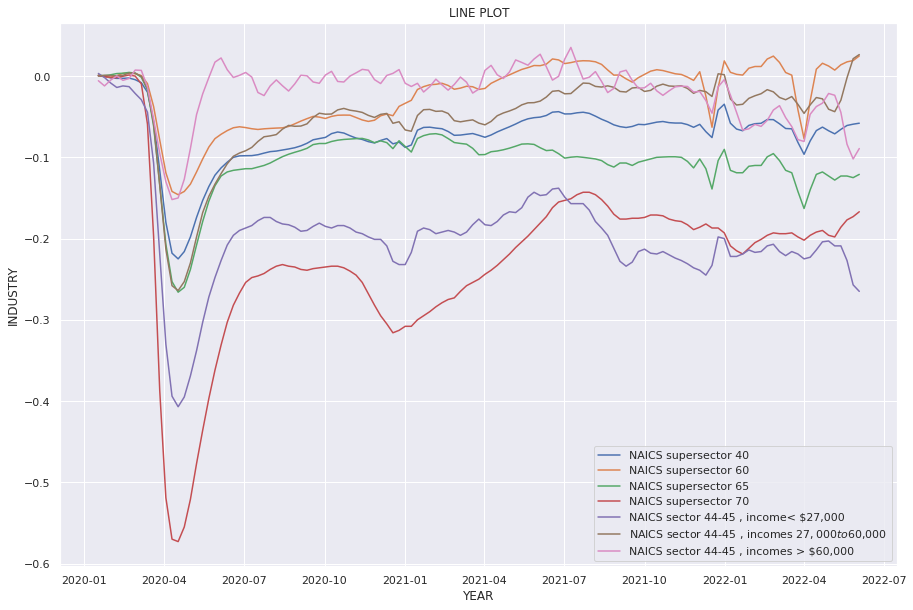

In [13]:


import seaborn as sns
from matplotlib import pyplot as plt

en_subset2 = en[['emp_ss40'	,'emp_ss60'	, 'emp_ss65',	'emp_ss70', 'emp_retail_inclow', 'emp_retail_incmiddle' , 'emp_retail_inchigh', 'DATE' ]] #subseted required data 

sns.set(rc={'figure.figsize':(15,10)})


sns.lineplot(en_subset2['DATE'],en_subset2['emp_ss40'], err_style=None , label = 'NAICS supersector 40 ')
sns.lineplot(en_subset2['DATE'],en_subset2['emp_ss60'], err_style=None, label = 'NAICS supersector 60 ')
sns.lineplot(en_subset2['DATE'],en_subset2['emp_ss65'], err_style=None, label = 'NAICS supersector 65')
sns.lineplot(en_subset2['DATE'],en_subset2['emp_ss70'], err_style=None, label = 'NAICS supersector 70')

sns.lineplot(en_subset2['DATE'],en_subset2['emp_retail_inclow'], err_style=None, label = 'NAICS sector 44-45 , income< $27,000')
sns.lineplot(en_subset2['DATE'],en_subset2['emp_retail_incmiddle'], err_style=None, label = 'NAICS sector 44-45 , incomes $27,000 to $60,000')
sns.lineplot(en_subset2['DATE'],en_subset2['emp_retail_inchigh'], err_style=None, label = 'NAICS sector 44-45 , incomes > $60,000')



plt.title('LINE PLOT')
plt.xlabel('YEAR')
plt.ylabel('INDUSTRY')

